<a href="https://colab.research.google.com/github/NakshatraDigala/Prodigy-tasks/blob/main/Prodigy_Neural_style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow matplotlib


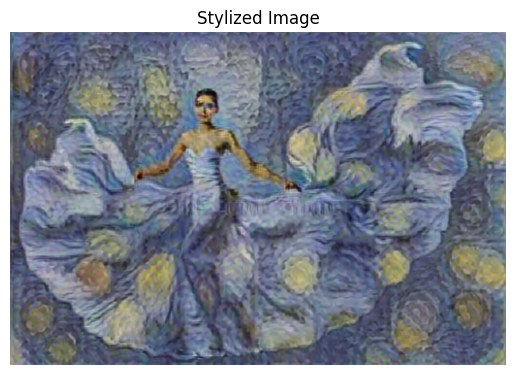

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import tensorflow_hub as hub

# Function to load and preprocess image
def load_image(path_to_img, max_dim=512):
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

# Function to show images
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

# Load content and style images
content_path = '/content/Content image.jpg'
style_path = '/content/Style image.jpg'

content_image = load_image(content_path)
style_image = load_image(style_path)

# Load the style transfer model from TensorFlow Hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Apply style transfer
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

# Show the result
imshow(stylized_image, title='Stylized Image')
